In [1]:
%pip install pandas matplotlib keras tensorflow
%pip install scipy
%pip install opencv-python


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import cv2
import shutil

# Training with CNN

In [3]:
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras import layers

from keras import losses, optimizers, metrics


In [ ]:
## test.csv editing

# df_new = pd.read_csv("C:/Users/Faizan/Desktop/Project/Emergency_Vehicles/test.csv")

# for i in range(len(df_new)):
#     if int(df_new['image_names'][i][:-4]) > 995:
#         df_new['emergency_or_not'][i] = 0
#     else:
#         df_new['emergency_or_not'][i] = 1

# df_new.to_csv('C:/Users/Faizan/Desktop/Project/Emergency_Vehicles/test.csv', index = False)

In [38]:
# src_path = 'C:\\Users\\Faizan\\Desktop\\Project\\Emergency_Vehicles\\train\\'
# dest_path_emergency = 'C:/Users/Faizan/Desktop/Project/Classified Data/train/Emergency/'
# dest_path_non_emergency = 'C:/Users/Faizan/Desktop/Project/Classified Data/train/Non_Emergency/'

# files_list = os.listdir(src_path)

In [40]:
# df = pd.read_csv(r'C:/Users/Faizan/Desktop/Project/Emergency_Vehicles/train.csv')

# for i in range(len(df)):
#     if df['emergency_or_not'][i] == 1:
#         src = src_path + df['image_names'][i]
#         dest = dest_path_emergency + df['image_names'][i]
#         shutil.copyfile(src, dest)
#     if df['emergency_or_not'][i] == 0:
#         src = src_path + df['image_names'][i]
#         dest = dest_path_non_emergency + df['image_names'][i]
#         shutil.copyfile(src, dest)
    

In [48]:
# src_path_test = 'C:/Users/Faizan/Desktop/Project/Emergency_Vehicles/test/'
# dest_path_emergency_test = 'C:/Users/Faizan/Desktop/Project/Classified Data/test/Emergency/'
# dest_path_non_emergency_test = 'C:/Users/Faizan/Desktop/Project/Classified Data/test/Non_Emergency/'

# files_list_test = os.listdir(src_path_test)

In [49]:
# df_test = pd.read_csv(r'C:/Users/Faizan/Desktop/Project/Emergency_Vehicles/test.csv')

# for i in range(len(df_test)):
#     if df_test['emergency_or_not'][i] == 1:
#         src_test = src_path_test + df_test['image_names'][i]
#         dest_test = dest_path_emergency_test + df_test['image_names'][i]
#         shutil.copyfile(src_test, dest_test)
#     if df_test['emergency_or_not'][i] == 0:
#         src_test = src_path_test + df_test['image_names'][i]
#         dest_test = dest_path_non_emergency_test + df_test['image_names'][i]
#         shutil.copyfile(src_test, dest_test)

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'C:/Users/Faizan/Desktop/Project/Classified Data/train/'
test_dir = 'C:/Users/Faizan/Desktop/Project/Classified Data/test/'

dim = 64

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (dim, dim),
    batch_size=8
)

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

model.compile(optimizer=optimizers.Adam(5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

Found 1646 images belonging to 2 classes.
Found 706 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        36928     
                                     

In [6]:
model.save("model.h5")

In [8]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'C:/Users/Faizan/Desktop/Project/Classified Data/train/'
test_dir = 'C:/Users/Faizan/Desktop/Project/Classified Data/test/'

dim = 350


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (dim, dim),
    batch_size=8
)

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

model.compile(optimizer=optimizers.Adam(5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

Found 1646 images belonging to 2 classes.
Found 706 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 348, 348, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 174, 174, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 172, 172, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 86, 86, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 84, 84, 64)        36928     
                                     

In [11]:
model.save("model_2.h5")

In [12]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'C:/Users/Faizan/Desktop/Project/Classified Data/train/'
test_dir = 'C:/Users/Faizan/Desktop/Project/Classified Data/test/'
 
dim = 48


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (dim, dim),
    batch_size=8
)

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

model.compile(optimizer=optimizers.Adam(5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

Found 1646 images belonging to 2 classes.
Found 706 images belonging to 2 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 10, 10, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 8, 8, 64)          36928     
                                     

In [13]:
model.save("model_3.h5")

In [6]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'C:/Users/Faizan/Desktop/Project/Classified Data/train/'
test_dir = 'C:/Users/Faizan/Desktop/Project/Classified Data/test/'

dim = 224


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (dim, dim),
    batch_size=8
)

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

model.compile(optimizer=optimizers.Adam(5e-5),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

Found 1646 images belonging to 2 classes.
Found 706 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                       

In [7]:
model.save("model_4.h5")

In [14]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = 'C:/Users/Faizan/Desktop/Project/Classified Data/train/'
test_dir = 'C:/Users/Faizan/Desktop/Project/Classified Data/test/'

dim = 128


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (dim, dim),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (dim, dim),
    batch_size=8
)

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(dim, dim, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

model.compile(optimizer=optimizers.Adam(1e-4),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=31
)

Found 1646 images belonging to 2 classes.
Found 706 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        36928     
                                       

In [18]:
model.save("model_5.h5")

INFO:tensorflow:Assets written to: CNN_128x3.model\assets


INFO:tensorflow:Assets written to: CNN_128x3.model\assets


In [4]:
import tensorflow as tf

emergency_or_not = ["Emergency", "Non_Emergency"]

def prepare(filepath):
    IMG_SIZE = 224
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tf.keras.models.load_model("C:/Users/Faizan/Desktop/Project/emergency_vehicles_detection-master/model_4.h5")

test=[]
test.append([prepare('C:/Users/Faizan/Desktop/Project/Vauxhall_Insignia_response_car.jpg')])
# test.append([prepare('C:/Users/Faizan/Desktop/Project/Mahindra-XUV700-police-vehicle-featured.jpg')])
prediction = model.predict(test)

print(emergency_or_not[int(prediction[0][0])])

1/1 [==============================] - 1s 1s/step
Non_Emergency


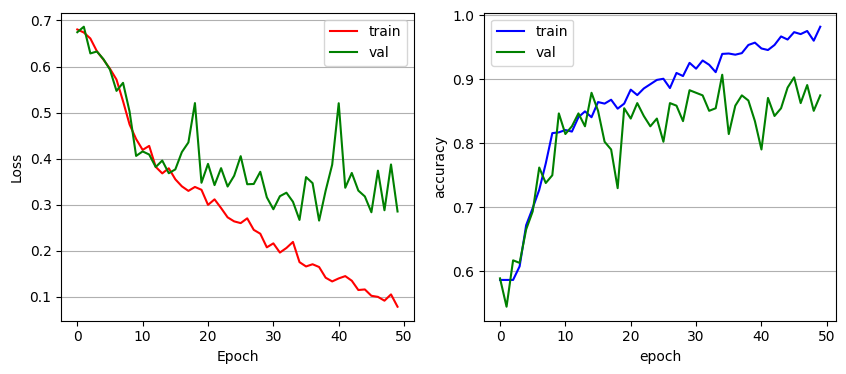

In [8]:
figure = plt.figure(figsize = (10,4))
ax = plt.subplot(121)

ax.plot(history.history['loss'], 'r', label = 'train')
ax.plot(history.history['val_loss'],'g',label = 'val')

plt.legend()
plt.grid(axis = 'y')
plt.xlabel("Epoch")
plt.ylabel("Loss")

ax2 = plt.subplot(122)
ax2.plot(history.history['accuracy'], 'b', label="train")
ax2.plot(history.history['val_accuracy'], 'g', label="val")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.grid(axis='y')
plt.savefig("Emergency dataset with data augmentation")